In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.precision", 2)
sns.set()
%matplotlib inline

In [2]:
data = pd.read_csv('./survery_data.csv')

In [3]:
data.head()

,Timestamp,Are you in a technical-related major / field?,How many hours per day do you typically use the internet (please enter a number and use decimals for partial hours)?,Please rate how 'tech-savvy' you believe yourself to be.,"Answer quickly: If you ever happen to stumble upon an option on a webpage as the one in the below snippet, are you going to check the box?","You are checking out an online shopping site and are being asked to add an item to your basket, which is the first button you are pressing?","You want to download a given file from the website below. Which download button do you ""instinctively"" click?",How many options do you think you are allowed to select in the following response prompt?,"Are you familiar with the term ""Dark Pattern""?",Have you taken any measures to learn about the general guidelines of internet safety?,"If your answer to the previous question is ""Yes"" please explain which measures below, otherwise type ""no"" in the box."
0,11/19/2021 9:53:16,No,6.5,3,No,The right button,Option 1,1,No,No,NaN
1,11/19/2021 9:57:55,No,12.0,3,No,The left button,Option 1,4,No,No,no
2,11/19/2021 11:12:14,No,10.0,4,No,The left button,Option 2,4,No,Yes,Don't download anything from suspicious websit...
3,11/19/2021 11:13:40,Yes,8.0,4,No,The left button,Option 1,4,No,No,NaN
4,11/19/2021 11:16:56,No,8.5,3,No,The left button,Option 2,1,No,No,No


In [4]:
data.columns = ["timestamp", 
    "is_tech_major", 
    "avg_internet_use", 
    "tech_savvy_level", 
    "will_click_checkbox", 
    "will_click_donation", 
    "download_option", 
    "options_permitted_to_select", 
    "know_about_dark_pattern", 
    "learnt_guidelines", 
    "brief_explanation"
]

data.drop(columns=["timestamp", "brief_explanation"], inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   is_tech_major                54 non-null     object 
 1   avg_internet_use             54 non-null     float64
 2   tech_savvy_level             54 non-null     int64  
 3   will_click_checkbox          54 non-null     object 
 4   will_click_donation          54 non-null     object 
 5   download_option              54 non-null     object 
 6   options_permitted_to_select  54 non-null     int64  
 7   know_about_dark_pattern      54 non-null     object 
 8   learnt_guidelines            54 non-null     object 
dtypes: float64(1), int64(2), object(6)
memory usage: 3.9+ KB


In [6]:
data.head()

,is_tech_major,avg_internet_use,tech_savvy_level,will_click_checkbox,will_click_donation,download_option,options_permitted_to_select,know_about_dark_pattern,learnt_guidelines
0,No,6.5,3,No,The right button,Option 1,1,No,No
1,No,12.0,3,No,The left button,Option 1,4,No,No
2,No,10.0,4,No,The left button,Option 2,4,No,Yes
3,Yes,8.0,4,No,The left button,Option 1,4,No,No
4,No,8.5,3,No,The left button,Option 2,1,No,No


In [7]:
data['is_tech_major'] = data['is_tech_major'].map({'No': 0, 'Yes': 1})
data['avg_internet_use'] = (data['avg_internet_use'] >= 10).map({False: 0, True: 1})
data['tech_savvy_level'] = data['tech_savvy_level'].map({1: 0, 2: 0, 3: 0, 4: 1, 5: 1})
data['will_click_checkbox'] = data['will_click_checkbox'].map({'No': 0, 'Yes': 1})
data['will_click_donation'] = data['will_click_donation'].map({'The left button': 0, 'The right button': 1})
data['download_option'] = data['download_option'].map({'Option 1': 1, 'Option 2': 2, 'Option 3': 3})
data['know_about_dark_pattern'] = data['know_about_dark_pattern'].map({'No': 0, 'Yes': 1})
data['learnt_guidelines'] = data['learnt_guidelines'].map({'No': 0, 'Yes': 1})
data['count'] = np.ones(data.shape[0])

In [8]:
data.head()

,is_tech_major,avg_internet_use,tech_savvy_level,will_click_checkbox,will_click_donation,download_option,options_permitted_to_select,know_about_dark_pattern,learnt_guidelines,count
0,0,0,0,0,1,1,1,0,0,1.0
1,0,1,0,0,0,1,4,0,0,1.0
2,0,1,1,0,0,2,4,0,1,1.0
3,1,0,1,0,0,1,4,0,0,1.0
4,0,0,0,0,0,2,1,0,0,1.0


In [9]:
data['is_tech_major'].value_counts(normalize=True)

1    0.7
0    0.3
Name: is_tech_major, dtype: float64

In [10]:
data['avg_internet_use'].value_counts(normalize=True)

0    0.59
1    0.41
Name: avg_internet_use, dtype: float64

In [11]:
data['tech_savvy_level'].value_counts(normalize=True)

1    0.54
0    0.46
Name: tech_savvy_level, dtype: float64

In [12]:
pd.crosstab(data['is_tech_major'], data['will_click_checkbox'], normalize='index')

will_click_checkbox,0,1
is_tech_major,,
0,0.75,0.25
1,0.71,0.29


In [13]:
pd.crosstab(data['is_tech_major'], data['will_click_donation'], normalize='index')

will_click_donation,0,1
is_tech_major,,
0,0.69,0.31
1,0.71,0.29


In [14]:
pd.crosstab(data['is_tech_major'], data['download_option'], normalize='index')

download_option,1,2
is_tech_major,,
0,0.69,0.31
1,0.50,0.50


In [15]:
data['options_permitted_to_select'].value_counts(normalize=True)

1    0.52
4    0.31
0    0.06
2    0.06
3    0.06
Name: options_permitted_to_select, dtype: float64

Text(0.5, 1.0, 'Plot showing the responses for Q7.')

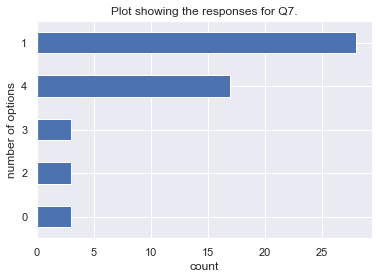

In [16]:
data['options_permitted_to_select'].value_counts().sort_values().plot(kind = 'barh');
plt.xlabel('count')
plt.ylabel('number of options')
plt.title('Plot showing the responses for Q7.')

In [17]:
pd.crosstab(data['is_tech_major'], data['options_permitted_to_select'], normalize='index')

options_permitted_to_select,0,1,2,3,4
is_tech_major,,,,,
0,0.00,0.31,0.19,0.00,0.50
1,0.08,0.61,0.00,0.08,0.24


In [18]:
pd.crosstab(data['is_tech_major'], data['know_about_dark_pattern'], normalize='index')

know_about_dark_pattern,0,1
is_tech_major,,
0,0.94,0.06
1,0.76,0.24


In [19]:
pd.crosstab(data['is_tech_major'], data['learnt_guidelines'], normalize='index')

learnt_guidelines,0,1
is_tech_major,,
0,0.88,0.12
1,0.74,0.26


In [20]:
pd.crosstab([data['is_tech_major'], data['know_about_dark_pattern']], data['will_click_checkbox'])

will_click_checkbox                     0  1
is_tech_major know_about_dark_pattern       
0             0                        11  4
              1                         1  0
1             0                        20  9
              1                         7  2

In [21]:
int(data[((data['is_tech_major'] == 1)
 & (data['know_about_dark_pattern'] == 1)
 & (data['will_click_checkbox'] == 0)
 & (data['download_option'] == 2)
 & (data['will_click_donation'] == 0))]['count'].sum())

4